In [1]:
import nltk
from nltk import FreqDist
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np

import re
import spacy

import gensim
from gensim import corpora


import pyLDAvis
#import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_json("/home/dara-sravan-kumar/Downloads/Automotive_5.json",lines=True)
df.shape

(20473, 9)

In [4]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car and these had good reviews and were at a good price. They have been used a few times already and do what they are supposed to - no complaints there....,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you wo...",4,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]","Can't comment much on these since they have not yet been used (I will come back and update my review is I find any issues after first use) ... but they are built solid, nice tough big hard clamps ...",5,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]","I absolutley love Amazon!!! For the price of a set of cheap Booster/Jumper Cables in a brick and morter store, you can buy extra long and heavy duty jumpers! First off, don't be the person that ...",5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]","I purchased the 12' feet long cable set and they arrived in a retail cardboard box with handle, which could be used as a storage and carrying case for these cables, although I will not need to sto...",5,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"
...,...,...,...,...,...,...,...,...,...
20468,A1KB43BI085A48,B00KIAQ8VW,Mike F.,"[1, 1]","I've bought 10 of these over the past year to give as gifts to friends and club brothers, and have had no reports of wear issues, flaws, manufacturing defects or discomfort. They work extremely w...",5,Excellent quality for the price,1396915200,"04 8, 2014"
20469,A3HIUWKL4D853W,B00KIAQ8VW,RayH,"[0, 0]","OK, I have to admit, the price of this item did not have my expectations unfairly high. It is a straight tube neck/face cover with a whimsical lower skull image on both front and back. Material ...",2,Light weight neck and face cover with whimsical design.,1391472000,"02 4, 2014"
20470,A1S95WASXJ02VX,B00KIAQ8VW,Roberto Aguilar Jr.,"[0, 0]",I love my skull face mask. It makes me outstand from the rest of my fellow riders. Everybody wants to have one. Every where I go they are over priced. Order it and give it as a guiff. It is really...,5,I love to ride with my Skull Face Mask.,1386547200,"12 9, 2013"
20471,A2IID0Z6EHF5KP,B00KIAQ8VW,Soarer,"[0, 0]",This mask of course as described is half-face but with a long protection for neck. It's great to cut the wind out with a jacket to keep this tucked.,5,Great neck protection,1357171200,"01 3, 2013"


In [5]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
  
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

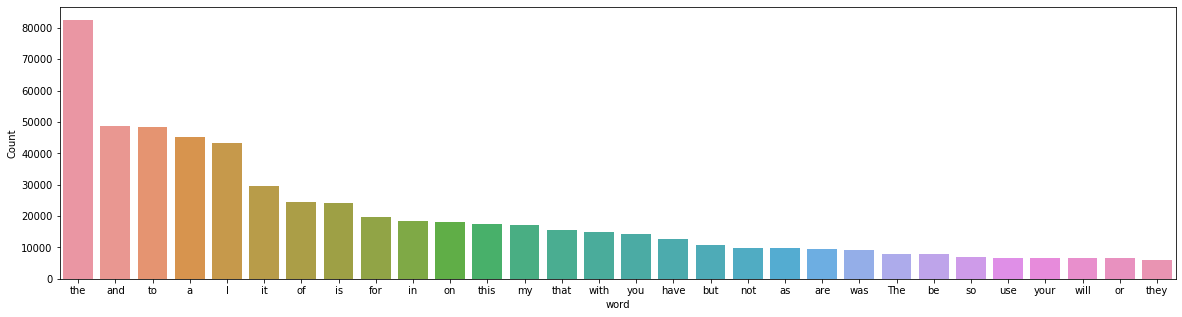

In [6]:
freq_words(df['reviewText'])

In [7]:
# replace "n't" with " not"
df['reviewText'] = df['reviewText'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

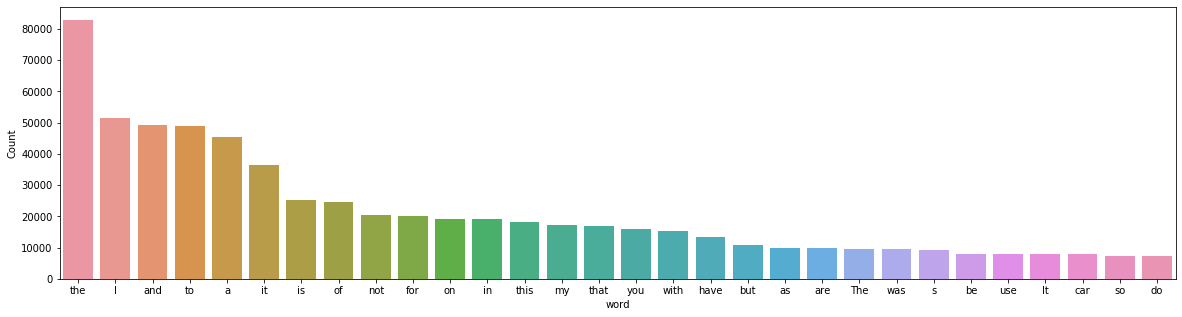

In [8]:
freq_words(df['reviewText'])

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [11]:
# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

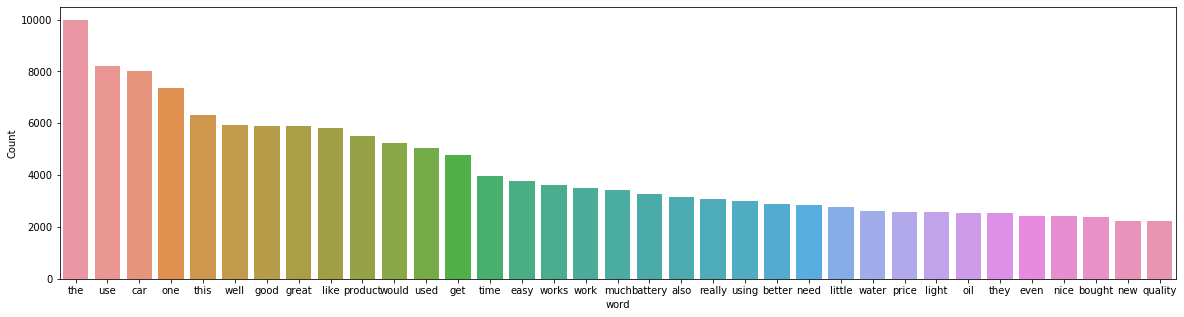

In [12]:
freq_words(reviews, 35)

In [13]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [14]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [15]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


In [16]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


29

In [52]:
print(tokenized_reviews[2])

['comment', 'much', 'since', 'yet', 'used', 'come', 'back', 'update', 'review', 'find', 'issues', 'first', 'use', 'built', 'solid', 'nice', 'tough', 'big', 'hard', 'clamps', 'love', 'long', 'cable', 'never', 'move', 'cars', 'around', 'anything', 'needed', 'bought', 'new', 'truck', 'since', 'always', 'need', 'cables', 'another', 'reason', 'tow', 'travel', 'trailer', 'run', 'batteries', 'shore', 'power', 'may', 'die', 'couple', 'days', 'need', 'quick', 'small', 'recharge', 'perfect', 'length', 'pop', 'hood', 'run', 'cables', 'back', 'truck', 'hook', 'batteries', 'tongue', 'travel', 'trailer', 'running', 'truck', 'minutes', 'nice', 'large', 'gauge', 'wire', 'connected', 'battery', 'tot', 'trailer', 'battery', 'give', 'bit', 'charge', 'ever', 'pinch', 'shore', 'power', 'solar', 'generator', 'recharge', 'bought', 'bucket', 'boss', 'jumper', 'cable', 'bag', 'fit', 'footer', 'perfectly', 'use', 'waste', 'money', 'right', 'easily', 'pay', 'first', 'time', 'need', 'always', 'prepared']


In [17]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


In [18]:
print(reviews_2[1])
len(reviews_2[1])

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


17

In [19]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'bucks',
 'cables',
 'expecting',
 'for',
 'knock',
 'like',
 'see',
 'seem',
 'seems',
 'snap',
 'these',
 'work',
 'would'}

In [20]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

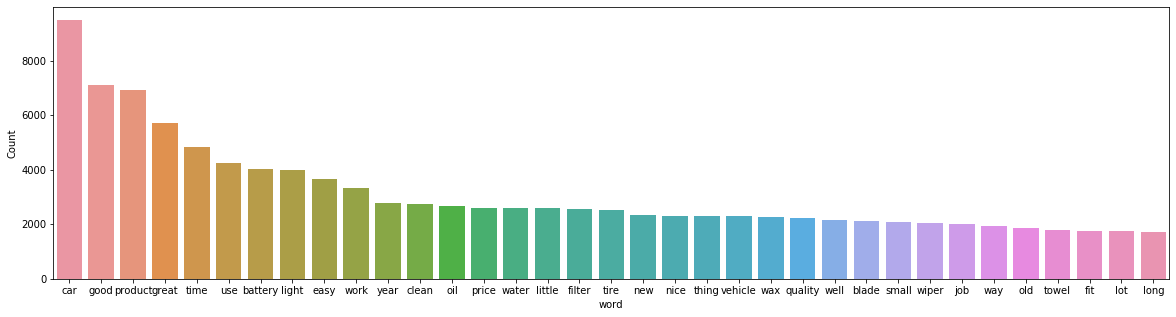

In [21]:
freq_words(df['reviews'], 35)

In [22]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [23]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [24]:

xx=pd.DataFrame(doc_term_matrix)
xx

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
0,"(0, 1)","(1, 2)","(2, 2)","(3, 1)","(4, 1)","(5, 1)","(6, 2)","(7, 2)","(8, 1)","(9, 1)",...,None,None,None,None,None,None,None,None,None,None
1,"(10, 1)","(12, 1)","(19, 1)","(20, 2)","(21, 1)","(22, 1)","(23, 1)","(24, 1)","(25, 1)","(26, 1)",...,None,None,None,None,None,None,None,None,None,None
2,"(2, 1)","(10, 1)","(11, 1)","(12, 1)","(14, 1)","(17, 1)","(20, 4)","(27, 1)","(32, 3)","(33, 1)",...,None,None,None,None,None,None,None,None,None,None
3,"(2, 11)","(3, 1)","(6, 1)","(7, 1)","(10, 2)","(12, 5)","(13, 3)","(15, 1)","(20, 16)","(28, 1)",...,None,None,None,None,None,None,None,None,None,None
4,"(5, 1)","(12, 2)","(15, 1)","(16, 1)","(20, 3)","(28, 1)","(32, 1)","(89, 1)","(127, 2)","(183, 1)",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20468,"(51, 1)","(257, 1)","(544, 1)","(647, 1)","(655, 1)","(686, 1)","(702, 1)","(2129, 1)","(2183, 1)","(2979, 1)",...,None,None,None,None,None,None,None,None,None,None
20469,"(6, 1)","(12, 1)","(13, 1)","(15, 2)","(19, 2)","(28, 1)","(36, 1)","(51, 1)","(115, 4)","(127, 1)",...,None,None,None,None,None,None,None,None,None,None
20470,"(115, 1)","(143, 1)","(475, 1)","(1224, 1)","(2891, 1)","(4149, 1)","(4724, 1)","(6691, 1)","(16623, 1)","(16624, 1)",...,None,None,None,None,None,None,None,None,None,None
20471,"(8, 1)","(12, 1)","(115, 1)","(133, 1)","(360, 1)","(574, 1)","(894, 1)","(999, 1)","(1068, 1)","(1266, 1)",...,None,None,None,None,None,None,None,None,None,None


In [25]:
id_words = [[(dictionary[id], count) for id, count in line] for line in doc_term_matrix]
yy=pd.DataFrame(id_words)
yy

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
0,"(brand, 1)","(bumper, 2)","(car, 2)","(close, 1)","(complaint, 1)","(foot, 1)","(front, 2)","(good, 2)","(great, 1)","(ideal, 1)",...,None,None,None,None,None,None,None,None,None,None
1,"(jumper, 1)","(long, 1)","(buck, 1)","(cable, 2)","(chinese, 1)","(dollar, 1)","(fine, 1)","(freight, 1)","(harbor, 1)","(little, 1)",...,None,None,None,None,None,None,None,None,None,None
2,"(car, 1)","(jumper, 1)","(length, 1)","(long, 1)","(new, 1)","(time, 1)","(cable, 4)","(money, 1)","(truck, 3)","(bag, 1)",...,None,None,None,None,None,None,None,None,None,None
3,"(car, 11)","(close, 1)","(front, 1)","(good, 1)","(jumper, 2)","(long, 5)","(lot, 3)","(price, 1)","(cable, 16)","(quality, 1)",...,None,None,None,None,None,None,None,None,None,None
4,"(foot, 1)","(long, 2)","(price, 1)","(set, 1)","(cable, 3)","(quality, 1)","(truck, 1)","(compartment, 1)","(high, 2)","(store, 1)",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20468,"(issue, 1)","(year, 1)","(report, 1)","(gift, 1)","(friend, 1)","(brother, 1)","(past, 1)","(flaw, 1)","(manufacturing, 1)","(defect, 1)",...,None,None,None,None,None,None,None,None,None,None
20469,"(front, 1)","(long, 1)","(lot, 1)","(price, 2)","(buck, 2)","(quality, 1)","(bit, 1)","(issue, 1)","(face, 4)","(high, 1)",...,None,None,None,None,None,None,None,None,None,None
20470,"(face, 1)","(love, 1)","(order, 1)","(cool, 1)","(mask, 1)","(fellow, 1)","(rider, 1)","(skull, 1)","(guiff, 1)","(outstand, 1)",...,None,None,None,None,None,None,None,None,None,None
20471,"(great, 1)","(long, 1)","(face, 1)","(jacket, 1)","(half, 1)","(course, 1)","(cut, 1)","(wind, 1)","(neck, 1)","(protection, 1)",...,None,None,None,None,None,None,None,None,None,None


In [26]:
print(dictionary)

Dictionary(16625 unique tokens: ['brand', 'bumper', 'car', 'close', 'complaint']...)


In [27]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.LdaModel

In [53]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=8, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [54]:
lda_model.print_topics()

[(0,
  '0.049*"light" + 0.038*"battery" + 0.030*"car" + 0.019*"power" + 0.017*"bulb" + 0.015*"bright" + 0.014*"device" + 0.011*"unit" + 0.011*"charger" + 0.010*"phone"'),
 (1,
  '0.029*"hose" + 0.026*"oil" + 0.017*"water" + 0.013*"tank" + 0.012*"engine" + 0.010*"inverter" + 0.010*"car" + 0.009*"gas" + 0.009*"air" + 0.009*"change"'),
 (2,
  '0.051*"tool" + 0.026*"mat" + 0.020*"heavy" + 0.018*"chemical" + 0.017*"glove" + 0.016*"grease" + 0.014*"duty" + 0.014*"work" + 0.011*"torque" + 0.009*"box"'),
 (3,
  '0.045*"product" + 0.041*"car" + 0.021*"wax" + 0.019*"clean" + 0.019*"good" + 0.017*"leather" + 0.014*"great" + 0.013*"paint" + 0.011*"time" + 0.011*"use"'),
 (4,
  '0.014*"plastic" + 0.012*"easy" + 0.011*"side" + 0.010*"small" + 0.010*"little" + 0.009*"fit" + 0.009*"good" + 0.008*"door" + 0.008*"thing" + 0.008*"great"'),
 (5,
  '0.035*"towel" + 0.031*"blade" + 0.031*"car" + 0.028*"wiper" + 0.024*"water" + 0.012*"windshield" + 0.012*"microfiber" + 0.011*"window" + 0.010*"rain" + 0.010*"

In [55]:
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/dara-sravan-kumar/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/dara-sravan-kumar/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.114634 -0.066808       1        1  17.781694
4      0.034002  0.144643       2        1  17.432941
0      0.044849 -0.084734       3        1  14.291189
6      0.117349  0.064949       4        1  12.923111
5      0.075954 -0.065750       5        1  12.593062
1      0.009937 -0.230874       6        1  10.594354
7      0.040787  0.231207       7        1  10.020929
2     -0.437512  0.007367       8        1   4.362720, topic_info=         Term         Freq        Total Category  logprob  loglift
139     light  4548.000000  4548.000000  Default  30.0000  30.0000
34    battery  2941.000000  2941.000000  Default  29.0000  29.0000
304   product  6786.000000  6786.000000  Default  28.0000  28.0000
521     towel  2361.000000  2361.000000  Default  27.0000  27.0000
323      tire  2300.000000  2300.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
327      cold   138.397685   356.916350   Topic8  -5.1423   2.1847
950      seal   135.390295   338.037760   Topic8  -5.1642   2.2171
129       hot   142.156073   524.063113   Topic8  -5.1155   1.8274
420  function   127.550374   270.149177   Topic8  -5.2239   2.3816
187   surface   124.549170  1237.145246   Topic8  -5.2477   0.8362

[487 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1289       5  0.992315  absorbent
1158       7  0.998782   accurate
8148       4  0.992345    acdelco
2793       3  0.406047    adapter
2793       7  0.593332    adapter
...      ...       ...        ...
257        7  0.053734       year
3325       8  0.995770      young
6695       8  0.987107     zipper
16424      3  0.995850      zubie
6573       5  0.993026      zwipe

[790 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 7, 6, 2, 8, 3])

In [31]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.041*"battery" + 0.033*"car" + 0.021*"power" + 0.016*"device" + 0.014*"unit" + 0.013*"light" + 0.011*"charger" + 0.010*"phone" + 0.010*"plug" + 0.010*"time"'),
 (1,
  '0.028*"oil" + 0.026*"hose" + 0.021*"filter" + 0.014*"air" + 0.013*"water" + 0.012*"car" + 0.012*"tank" + 0.010*"engine" + 0.010*"change" + 0.009*"inverter"'),
 (2,
  '0.024*"tire" + 0.013*"use" + 0.012*"small" + 0.012*"tool" + 0.012*"easy" + 0.011*"good" + 0.011*"gauge" + 0.010*"plastic" + 0.010*"nice" + 0.009*"work"'),
 (3,
  '0.042*"car" + 0.040*"product" + 0.019*"clean" + 0.019*"wax" + 0.019*"good" + 0.016*"leather" + 0.014*"great" + 0.012*"paint" + 0.011*"use" + 0.011*"time"'),
 (4,
  '0.049*"light" + 0.018*"bulb" + 0.016*"bright" + 0.010*"side" + 0.009*"door" + 0.009*"tape" + 0.009*"front" + 0.009*"white" + 0.008*"color" + 0.008*"jack"'),
 (5,
  '0.037*"towel" + 0.033*"blade" + 0.030*"wiper" + 0.026*"car" + 0.022*"water" + 0.013*"windshield" + 0.011*"window" + 0.010*"rain" + 0.010*"microfiber" + 0.009*"dry"

In [32]:
x=lda_model.get_document_topics(doc_term_matrix, minimum_probability=None, minimum_phi_value=None, per_word_topics=False)

In [33]:
print(len(list(x)))

20473


In [34]:
data=pd.DataFrame(df["overall"])
#data=df["overall"]
data["Topic"]=list(x)


data.head()

,overall,Topic
0,5,"[(0, 0.24571905), (4, 0.40738165), (6, 0.32394293)]"
1,4,"[(0, 0.22747557), (2, 0.10710018), (4, 0.29958528), (6, 0.34197447)]"
2,5,"[(0, 0.44159716), (2, 0.24757865), (4, 0.24859294), (5, 0.024375038), (6, 0.033756923)]"
3,5,"[(0, 0.7017664), (1, 0.022415508), (2, 0.16360725), (3, 0.023000961), (4, 0.049639925), (6, 0.03903571)]"
4,5,"[(0, 0.098833516), (2, 0.64160645), (4, 0.037272356), (6, 0.2069444)]"


In [35]:
def temp(x):
    y=[]
    for i in x:
        y.append(i[0])
    return y 


data['Topic'].apply(lambda x : temp(x))

    

0                    [0, 4, 6]
1                 [0, 2, 4, 6]
2              [0, 2, 4, 5, 6]
3           [0, 1, 2, 3, 4, 6]
4                 [0, 2, 4, 6]
                 ...          
20468    [0, 1, 2, 3, 4, 5, 6]
20469       [0, 1, 2, 4, 5, 6]
20470    [0, 1, 2, 3, 4, 5, 6]
20471    [0, 1, 2, 3, 4, 5, 6]
20472    [0, 1, 2, 3, 4, 5, 6]
Name: Topic, Length: 20473, dtype: object

In [36]:
data

,overall,Topic
0,5,"[(0, 0.24571905), (4, 0.40738165), (6, 0.32394293)]"
1,4,"[(0, 0.22747557), (2, 0.10710018), (4, 0.29958528), (6, 0.34197447)]"
2,5,"[(0, 0.44159716), (2, 0.24757865), (4, 0.24859294), (5, 0.024375038), (6, 0.033756923)]"
3,5,"[(0, 0.7017664), (1, 0.022415508), (2, 0.16360725), (3, 0.023000961), (4, 0.049639925), (6, 0.03903571)]"
4,5,"[(0, 0.098833516), (2, 0.64160645), (4, 0.037272356), (6, 0.2069444)]"
...,...,...
20468,5,"[(0, 0.122495264), (1, 0.43954012), (2, 0.0119187655), (3, 0.01192779), (4, 0.11852059), (5, 0.011956634), (6, 0.2836408)]"
20469,2,"[(0, 0.053164758), (1, 0.07599465), (2, 0.16356765), (4, 0.2442373), (5, 0.20654078), (6, 0.25431374)]"
20470,5,"[(0, 0.1292587), (1, 0.013237426), (2, 0.5232901), (3, 0.12306075), (4, 0.18465258), (5, 0.013237168), (6, 0.013263299)]"
20471,5,"[(0, 0.011923749), (1, 0.011924094), (2, 0.011941494), (3, 0.3763698), (4, 0.42544943), (5, 0.15044859), (6, 0.011942836)]"


In [37]:
def temp(x):
    y=[0,0,0,0,0,0,0]
    for i in x:
        y[i[0]]=1
    return y


var=data['Topic']=data["Topic"].apply(lambda x : temp(x))

var.values

array([list([1, 0, 0, 0, 1, 0, 1]), list([1, 0, 1, 0, 1, 0, 1]),
       list([1, 0, 1, 0, 1, 1, 1]), ..., list([1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1]), list([1, 1, 1, 1, 1, 1, 1])],
      dtype=object)

In [38]:
for i in range(0,7):
    data[str(i)] = data['Topic'].apply( lambda x : x[i]) 

In [39]:
data.drop(columns=["Topic"],axis=1,inplace=True)

In [40]:
data

,overall,0,1,2,3,4,5,6
0,5,1,0,0,0,1,0,1
1,4,1,0,1,0,1,0,1
2,5,1,0,1,0,1,1,1
3,5,1,1,1,1,1,0,1
4,5,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
20468,5,1,1,1,1,1,1,1
20469,2,1,1,1,0,1,1,1
20470,5,1,1,1,1,1,1,1
20471,5,1,1,1,1,1,1,1


In [104]:
topic0=(data["overall"][data["0"]==1]>4).sum()
l0=len(data["overall"][data["0"]==1])

topic1=(data["overall"][data["1"]==1]>4).sum()
l1=len(data["overall"][data["1"]==1])

topic2=(data["overall"][data["2"]==1]>4).sum()
l2=len(data["overall"][data["2"]==1])

topic3=(data["overall"][data["3"]==1]>4).sum()
l3=len(data["overall"][data["3"]==1])

topic4=(data["overall"][data["4"]==1]>4).sum()
l4=len(data["overall"][data["4"]==1])

topic5=(data["overall"][data["5"]==1]>4).sum()
l5=len(data["overall"][data["5"]==1])

topic6=(data["overall"][data["6"]==1]>4).sum()
l6=len(data["overall"][data["6"]==1])


print(lo,l1,l2,l3,l4,l5,l6)

14569 15427 16075 14820 15750 14762 16432


In [105]:
print("topic0=",topic0/l0,"; positive feedback :" ,(topic0/l0)*100,";negative feedback :",100-(topic0/l0)*100)
print("topic1=",topic1/l1,"; positive feedback :" ,(topic1/l1)*100,";negative feedback :",100-(topic1/l1)*100)
print("topic2=",topic2/l2,"; positive feedback :" ,(topic2/l2)*100,";negative feedback :",100-(topic2/l2)*100)
print("topic3=",topic3/l3,"; positive feedback :" ,(topic3/l3)*100,";negative feedback :",100-(topic3/l3)*100)
print("topic4=",topic4/l4,"; positive feedback :" ,(topic4/l4)*100,";negative feedback :",100-(topic4/l4)*100)
print("topic5=",topic5/l5,"; positive feedback :" ,(topic5/l5)*100,";negative feedback :",100-(topic5/l5)*100)
print("topic6=",topic6/l6,"; positive feedback :" ,(topic6/l6)*100,";negative feedback :",100-(topic6/l6)*100)







topic0= 0.6940078248335507 ; positive feedback : 69.40078248335507 ;negative feedback : 30.599217516644927
topic1= 0.6935891618590783 ; positive feedback : 69.35891618590783 ;negative feedback : 30.64108381409217
topic2= 0.6814307931570762 ; positive feedback : 68.14307931570762 ;negative feedback : 31.856920684292376
topic3= 0.6877867746288799 ; positive feedback : 68.778677462888 ;negative feedback : 31.221322537112002
topic4= 0.6753650793650794 ; positive feedback : 67.53650793650795 ;negative feedback : 32.463492063492055
topic5= 0.6862891207153502 ; positive feedback : 68.62891207153503 ;negative feedback : 31.371087928464974
topic6= 0.6879868549172347 ; positive feedback : 68.79868549172346 ;negative feedback : 31.20131450827654


In [43]:
df["Topic"]=list(x)
df['Topic']=df["Topic"].apply(lambda x : temp(x))
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviews,Topic
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",needed set jumper cables for new car and these had good reviews and were good price They have been used few times already and what they are supposed complaints there What will say that feet really...,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011",set jumper new car good good price time complaint foot ideal length front bumper front bumper long lot time car close great brand version,"[1, 0, 0, 0, 1, 0, 1]"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]",These long cables work fine for truck but the quality seems little the shabby side For the money was not expecting dollar snap jumper cables but these seem more like what you would see chinese kno...,4,Okay long cables,1315094400,"09 4, 2011",long cable fine truck quality little shabby side money dollar jumper cable chinese shop harbor freight buck,"[1, 0, 1, 0, 1, 0, 1]"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",not comment much these since they have not yet been used will come back and update review find any issues after first use but they are built solid nice tough big hard clamps and love having long c...,5,Looks and feels heavy Duty,1374710400,"07 25, 2013",comment update review issue first use solid nice tough big hard clamp long cable car new truck cable reason tow travel trailer run battery power couple day quick small recharge perfect length pop ...,"[1, 0, 1, 0, 1, 1, 1]"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",absolutley love Amazon For the price set cheap Booster Jumper Cables brick and morter store you can buy extra long and heavy duty jumpers First off not the person that not only needs ask kind pass...,5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010",absolutley love amazon price cheap booster jumper cable morter store long heavy duty jumper first person passer jump cable easy jump cable talk long cable possible major car pole wall way street b...,"[1, 1, 1, 1, 1, 0, 1]"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",purchased the feet long cable set and they arrived retail cardboard box with handle which could used storage and carrying case for these cables although will not need store them with the carry box...,5,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012",foot long cable set retail cardboard box handle storage carrying case cable store box high quality long cable high grade material worth price seat storage compartment truck,"[1, 0, 1, 0, 1, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...
20468,A1KB43BI085A48,B00KIAQ8VW,Mike F.,"[1, 1]",bought these over the past year give gifts friends and club brothers and have had reports wear issues flaws manufacturing defects discomfort They work extremely well and would not hesitate buy the...,5,Excellent quality for the price,1396915200,"04 8, 2014",past year gift friend club brother report issue flaw manufacturing defect,"[1, 1, 1, 1, 1, 1, 1]"
20469,A3HIUWKL4D853W,B00KIAQ8VW,RayH,"[0, 0]",have admit the price this item did not have expectations unfairly high straight tube neck face cover with whimsical lower skull image both front and back Material stretchy and easily pulls over th...,2,Light weight neck and face cover with whimsical design.,1391472000,"02 4, 2014",price item expectation high straight tube neck face whimsical low skull image front material face material breath condensation breath moisture face steam glass sunglass open goggle end tube strect...,"[1, 1, 1, 0, 1, 1, 1]"
20470,A1S95WASXJ02VX,B00KIAQ8VW,Roberto Aguilar Jr.,"[0, 0]",love skull face mask makes outstand from the rest fellow riders Everybody wants have one Every where they are over priced Order and give guiff really cool,5,I love to ride with my Skull Face Mask.,1386547200,"12 9, 2013",love skull face mask outstand fellow rider order guiff cool,"[1, 1, 1, 1, 1, 1, 1]"
20471,A2IID0Z6EHF5KP,B00KIAQ8VW,Soarer,"[0, 0]",

In [44]:
for i in range(0,7):
    df[str(i)] = df['Topic'].apply( lambda x : x[i]) 
    
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviews,Topic,0,1,2,3,4,5,6
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",needed set jumper cables for new car and these had good reviews and were good price They have been used few times already and what they are supposed complaints there What will say that feet really...,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011",set jumper new car good good price time complaint foot ideal length front bumper front bumper long lot time car close great brand version,"[1, 0, 0, 0, 1, 0, 1]",1,0,0,0,1,0,1
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]",These long cables work fine for truck but the quality seems little the shabby side For the money was not expecting dollar snap jumper cables but these seem more like what you would see chinese kno...,4,Okay long cables,1315094400,"09 4, 2011",long cable fine truck quality little shabby side money dollar jumper cable chinese shop harbor freight buck,"[1, 0, 1, 0, 1, 0, 1]",1,0,1,0,1,0,1
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",not comment much these since they have not yet been used will come back and update review find any issues after first use but they are built solid nice tough big hard clamps and love having long c...,5,Looks and feels heavy Duty,1374710400,"07 25, 2013",comment update review issue first use solid nice tough big hard clamp long cable car new truck cable reason tow travel trailer run battery power couple day quick small recharge perfect length pop ...,"[1, 0, 1, 0, 1, 1, 1]",1,0,1,0,1,1,1
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",absolutley love Amazon For the price set cheap Booster Jumper Cables brick and morter store you can buy extra long and heavy duty jumpers First off not the person that not only needs ask kind pass...,5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010",absolutley love amazon price cheap booster jumper cable morter store long heavy duty jumper first person passer jump cable easy jump cable talk long cable possible major car pole wall way street b...,"[1, 1, 1, 1, 1, 0, 1]",1,1,1,1,1,0,1
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",purchased the feet long cable set and they arrived retail cardboard box with handle which could used storage and carrying case for these cables although will not need store them with the carry box...,5,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012",foot long cable set retail cardboard box handle storage carrying case cable store box high quality long cable high grade material worth price seat storage compartment truck,"[1, 0, 1, 0, 1, 0, 1]",1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20468,A1KB43BI085A48,B00KIAQ8VW,Mike F.,"[1, 1]",bought these over the past year give gifts friends and club brothers and have had reports wear issues flaws manufacturing defects discomfort They work extremely well and would not hesitate buy the...,5,Excellent quality for the price,1396915200,"04 8, 2014",past year gift friend club brother report issue flaw manufacturing defect,"[1, 1, 1, 1, 1, 1, 1]",1,1,1,1,1,1,1
20469,A3HIUWKL4D853W,B00KIAQ8VW,RayH,"[0, 0]",have admit the price this item did not have expectations unfairly high straight tube neck face cover with whimsical lower skull image both front and back Material stretchy and easily pulls over th...,2,Light weight neck and face cover with whimsical design.,1391472000,"02 4, 2014",price item expectation high straight tube neck face whimsical low skull image front material face material breath condensation breath moisture face steam glass sunglass open goggle end tube strect...,"[1, 1, 1, 0, 1, 1, 1]",1,1,1,0,1,1,1
20470,A1S95WASXJ02VX,B00KIAQ8VW,Roberto Aguilar Jr.,"[0, 0]",love skull face mask makes outstand from the rest fellow riders Everybody wants have one Every where they are over priced Order and give guiff really cool,5,I love to ride with my Skull Face Mask.,1386547200,"12 9

In [45]:
df[["summary","overall"]][data["0"]==1]


,summary,overall
0,Work Well - Should Have Bought Longer Ones,5
1,Okay long cables,4
2,Looks and feels heavy Duty,5
3,Excellent choice for Jumper Cables!!!,5
4,"Excellent, High Quality Starter Cables",5
...,...,...
20468,Excellent quality for the price,5
20469,Light weight neck and face cover with whimsical design.,2
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5


In [46]:
df[["summary","overall"]][data["1"]==1]


,summary,overall
3,Excellent choice for Jumper Cables!!!,5
5,Compact and Strong !,5
7,for cars and pickups,5
11,Jumper Cables - The Real Deal,5
13,Not sure if they're really 2ga,4
...,...,...
20468,Excellent quality for the price,5
20469,Light weight neck and face cover with whimsical design.,2
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5


In [47]:
df[["summary","overall"]][data["2"]==1]


,summary,overall
1,Okay long cables,4
2,Looks and feels heavy Duty,5
3,Excellent choice for Jumper Cables!!!,5
4,"Excellent, High Quality Starter Cables",5
5,Compact and Strong !,5
...,...,...
20468,Excellent quality for the price,5
20469,Light weight neck and face cover with whimsical design.,2
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5


In [48]:
df[["summary","overall"]][data["3"]==1]


,summary,overall
3,Excellent choice for Jumper Cables!!!,5
7,for cars and pickups,5
8,Coleman Cable 08665 12-Feet Heavy-Duty Truck and Auto Battery Booster,4
9,Beefy,5
13,Not sure if they're really 2ga,4
...,...,...
20467,ehhhh,2
20468,Excellent quality for the price,5
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5


In [49]:
df[["summary","overall"]][data["4"]==1]


,summary,overall
0,Work Well - Should Have Bought Longer Ones,5
1,Okay long cables,4
2,Looks and feels heavy Duty,5
3,Excellent choice for Jumper Cables!!!,5
4,"Excellent, High Quality Starter Cables",5
...,...,...
20468,Excellent quality for the price,5
20469,Light weight neck and face cover with whimsical design.,2
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5


In [50]:
df[["summary","overall"]][data["5"]==1]


,summary,overall
2,Looks and feels heavy Duty,5
7,for cars and pickups,5
14,Plated copper wire from what I see,4
16,Does what I expected it to do.,3
18,"No Brainer, Easy to Use, Sturdy",5
...,...,...
20468,Excellent quality for the price,5
20469,Light weight neck and face cover with whimsical design.,2
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5


In [51]:
df[["summary","overall"]][data["6"]==1]


,summary,overall
0,Work Well - Should Have Bought Longer Ones,5
1,Okay long cables,4
2,Looks and feels heavy Duty,5
3,Excellent choice for Jumper Cables!!!,5
4,"Excellent, High Quality Starter Cables",5
...,...,...
20468,Excellent quality for the price,5
20469,Light weight neck and face cover with whimsical design.,2
20470,I love to ride with my Skull Face Mask.,5
20471,Great neck protection,5
